# Binary Classifier for whether a patient lives past 5 years or not after receiving breast cancer surgery

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets

from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression


 # Data

In [2]:
patientData = pd.read_csv("PatientInformation.csv", sep=",", names=['Age','Year of Surgery', '# of Lymph Nodes', 'Survived'])

patientData = patientData[['Age', 'Year of Surgery', '# of Lymph Nodes', 'Survived']]
patientData.head(10)


,Age,Year of Surgery,# of Lymph Nodes,Survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


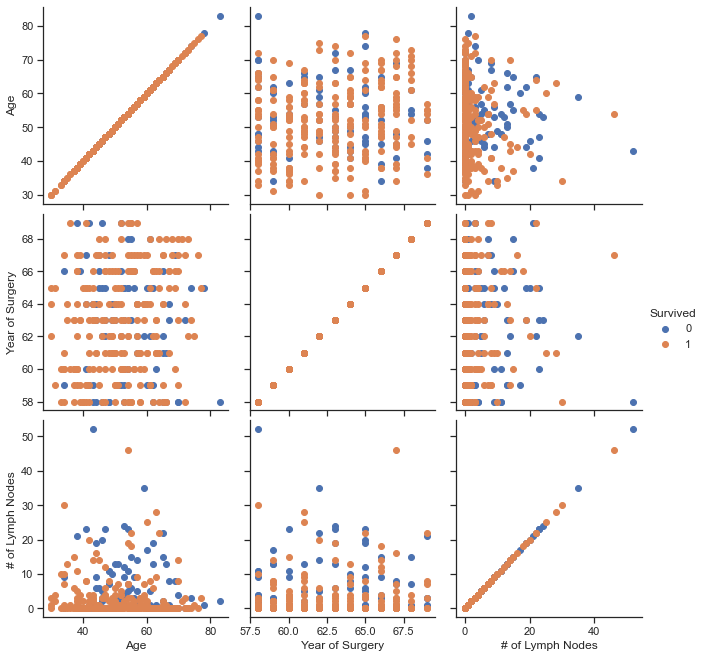

In [3]:
sns.set(style="ticks")
#sns.set_palette(sns.color_palette("husl", 8))
a = sns.PairGrid(data=patientData, hue="Survived", height=3)
a = a.map(plt.scatter)
a = a.add_legend()

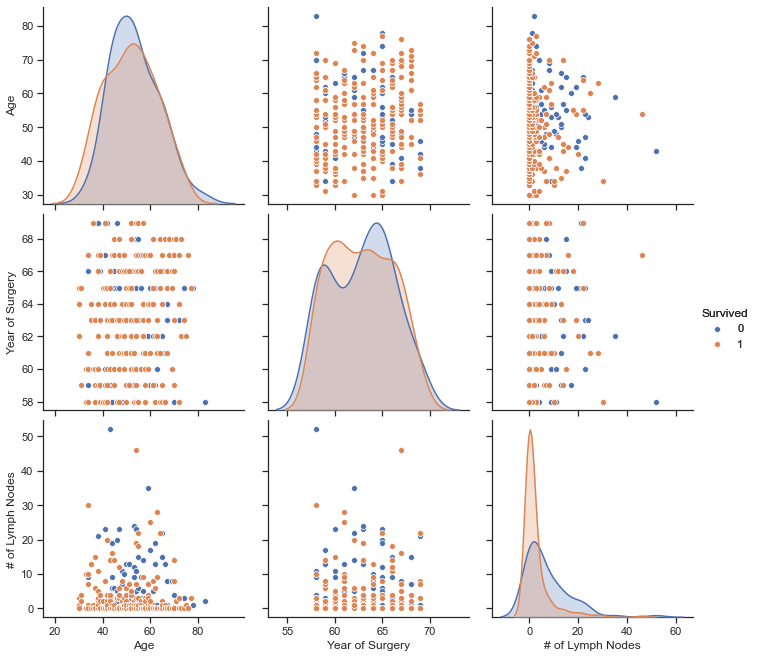

In [4]:
sns.set(style="ticks")
#sns.set_palette(sns.color_palette("husl", 8))
g = sns.pairplot(data=patientData, hue="Survived", height=3)
g = g.add_legend()



# Setting up Train and Test Data

In [5]:
import collections
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(patientData.drop(['Survived'], axis=1), patientData['Survived'], test_size=0.30, random_state=42)
print(collections.Counter(Y_train))
print(collections.Counter(Y_test))

Counter({1: 159, 0: 55})
Counter({1: 66, 0: 26})


# K-Nearest Neighbor

In [6]:
from sklearn.neighbors import KNeighborsClassifier
model =  KNeighborsClassifier(n_neighbors = 10)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

# Evaluation

Accuracy:  0.7391304347826086
AUC 0.6911421911421912
Precision 0.7916666666666666
Recall 0.8636363636363636


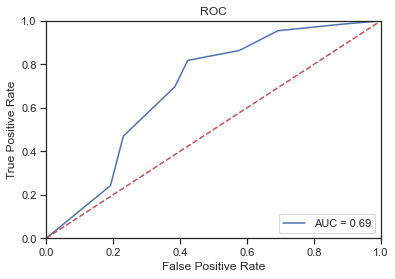

<Figure size 432x288 with 0 Axes>

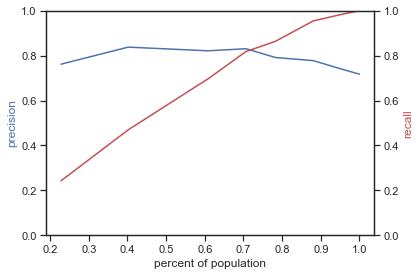

In [7]:
name = "K-Nearest Neighbor"
line_fmt = "-"


from sklearn import metrics
import sklearn.metrics as metrics
import numpy as np #will need this for PR
from sklearn.metrics import roc_auc_score

threshold = 0.5
accuracy = model.score(X_test, Y_test)
print("Accuracy: ", accuracy)
pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, pred)
auc_score = metrics.auc(fpr, tpr)
print("AUC",metrics.roc_auc_score(Y_test, pred))
print("Precision", metrics.precision_score(Y_test, pred > threshold))
print("Recall",metrics.recall_score(Y_test, pred > threshold))

plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' %auc_score)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], 'r--') #x=y line.  Visual aid
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

y_score = pred
precision_curve, recall_curve, pr_thresholds = metrics.precision_recall_curve(Y_test, pred)
precision_curve = precision_curve[:-1]
recall_curve = recall_curve[:-1]
pct_above_per_thresh = []
number_scored = len(pred)
for value in pr_thresholds:
    num_above_thresh = len(y_score[pred >= value])
    pct_above_thresh = num_above_thresh / float(number_scored)
    pct_above_per_thresh.append(pct_above_thresh)
pct_above_per_thresh = np.array(pct_above_per_thresh)
plt.clf()
fig, ax1 = plt.subplots()
ax1.plot(pct_above_per_thresh, precision_curve, 'b')
ax1.set_xlabel('percent of population')
ax1.set(ylim=(0, 1))

ax1.set_ylabel('precision', color='b')
ax2 = ax1.twinx()
ax1.plot(pct_above_per_thresh, recall_curve, 'r')
ax2.set_ylabel('recall', color='r')

plt.tight_layout()
plt.show()


# Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
model_RF= RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, class_weight="balanced", verbose = 1)
model_RF.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42,
                       verbose=1)

# Evaluation

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Accuracy:  0.6956521739130435
AUC 0.6733682983682985
Precision 0.7435897435897436
Recall 0.8787878787878788


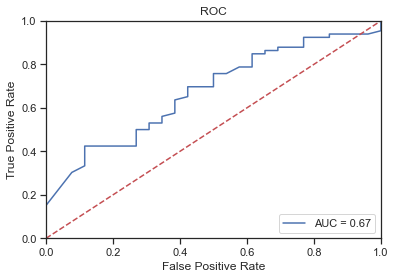

<Figure size 432x288 with 0 Axes>

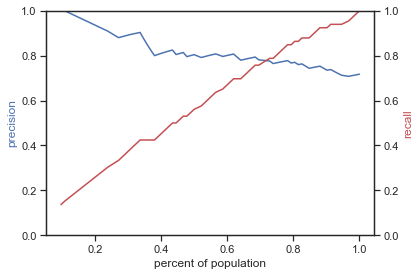

In [9]:
name = "Random Forest"
line_fmt = "-"

from sklearn import metrics
import sklearn.metrics as metrics
import numpy as np #will need this for PR
from sklearn.metrics import roc_auc_score

threshold = 0.5
accuracy = model_RF.score(X_test, Y_test)
print("Accuracy: ", accuracy)
RF_pred = model_RF.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, RF_pred)
auc_score_RF = metrics.auc(fpr, tpr)
print("AUC",metrics.roc_auc_score(Y_test, RF_pred))
print("Precision", metrics.precision_score(Y_test, RF_pred > threshold))
print("Recall",metrics.recall_score(Y_test, RF_pred > threshold))

plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' %auc_score_RF)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], 'r--') #x=y line.  Visual aid
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

plt.title('PR')
y_score = RF_pred
precision_curve, recall_curve, pr_thresholds = metrics.precision_recall_curve(Y_test, RF_pred)
precision_curve = precision_curve[:-1]
recall_curve = recall_curve[:-1]
pct_above_per_thresh = []
number_scored = len(RF_pred)
for value in pr_thresholds:
    num_above_thresh = len(y_score[RF_pred >= value])
    pct_above_thresh = num_above_thresh / float(number_scored)
    pct_above_per_thresh.append(pct_above_thresh)
pct_above_per_thresh = np.array(pct_above_per_thresh)
plt.clf()
fig, ax1 = plt.subplots()
ax1.plot(pct_above_per_thresh, precision_curve, 'b')
ax1.set_xlabel('percent of population')
ax1.set(ylim=(0, 1))

ax1.set_ylabel('precision', color='b')
ax2 = ax1.twinx()
ax1.plot(pct_above_per_thresh, recall_curve, 'r')
ax2.set_ylabel('recall', color='r')
    
plt.tight_layout()
plt.show()

# Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB()
model_NB.fit(X_train, Y_train)

GaussianNB()

# Evaluation

Accuracy:  0.7282608695652174
AUC 0.6171328671328671
Precision 0.7662337662337663
Recall 0.8939393939393939


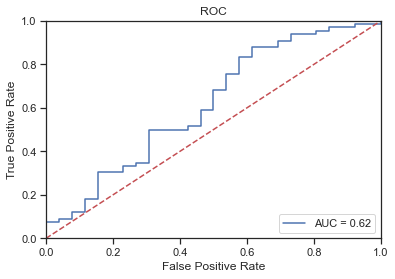

<Figure size 432x288 with 0 Axes>

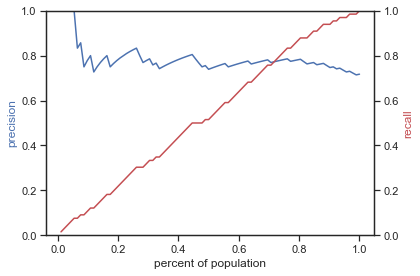

In [11]:
name = "Gaussian Naive Bayes"
line_fmt = "-"


from sklearn import metrics
import sklearn.metrics as metrics
import numpy as np #will need this for PR
from sklearn.metrics import roc_auc_score

threshold = 0.5
accuracy = model_NB.score(X_test, Y_test)
print("Accuracy: ", accuracy)
KB_pred = model_NB.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, KB_pred)
auc_score_KB = metrics.auc(fpr, tpr)
print("AUC",metrics.roc_auc_score(Y_test, KB_pred))
print("Precision", metrics.precision_score(Y_test, KB_pred > threshold))
print("Recall",metrics.recall_score(Y_test, KB_pred > threshold))

plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' %auc_score_KB)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], 'r--') #x=y line.  Visual aid
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

plt.title('PR')
y_score = KB_pred
precision_curve, recall_curve, pr_thresholds = metrics.precision_recall_curve(Y_test, KB_pred)
precision_curve = precision_curve[:-1]
recall_curve = recall_curve[:-1]
pct_above_per_thresh = []
number_scored = len(KB_pred)
for value in pr_thresholds:
    num_above_thresh = len(y_score[KB_pred >= value])
    pct_above_thresh = num_above_thresh / float(number_scored)
    pct_above_per_thresh.append(pct_above_thresh)
pct_above_per_thresh = np.array(pct_above_per_thresh)
plt.clf()
fig, ax1 = plt.subplots()
ax1.plot(pct_above_per_thresh, precision_curve, 'b')
ax1.set_xlabel('percent of population')
ax1.set(ylim=(0, 1))

ax1.set_ylabel('precision', color='b')
ax2 = ax1.twinx()
ax1.plot(pct_above_per_thresh, recall_curve, 'r')
ax2.set_ylabel('recall', color='r')
    
plt.tight_layout()
plt.show()


# Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, Y_train)

DecisionTreeClassifier()

# Evaluation

Accuracy:  0.6521739130434783
AUC 0.5477855477855478
Precision 0.7428571428571429
Recall 0.7878787878787878


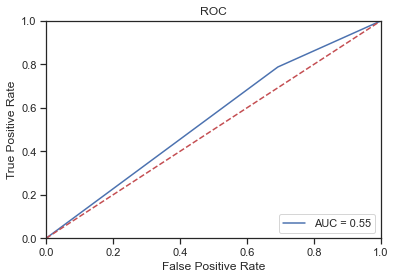

<Figure size 432x288 with 0 Axes>

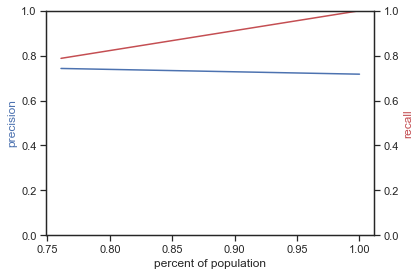

In [13]:
name = "Decision Tree"
line_fmt = "-"

from sklearn import metrics
import sklearn.metrics as metrics
import numpy as np #will need this for PR
from sklearn.metrics import roc_auc_score

threshold = 0.5
accuracy = model_DT.score(X_test, Y_test)
print("Accuracy: ", accuracy)
DT_pred = model_DT.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, DT_pred)
auc_score_DT = metrics.auc(fpr, tpr)
print("AUC",metrics.roc_auc_score(Y_test, DT_pred))
print("Precision", metrics.precision_score(Y_test, DT_pred > threshold))
print("Recall",metrics.recall_score(Y_test, DT_pred > threshold))

plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' %auc_score_DT)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], 'r--') #x=y line.  Visual aid
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

plt.title('PR')
y_score = DT_pred
precision_curve, recall_curve, pr_thresholds = metrics.precision_recall_curve(Y_test, DT_pred)
precision_curve = precision_curve[:-1]
recall_curve = recall_curve[:-1]
pct_above_per_thresh = []
number_scored = len(DT_pred)
for value in pr_thresholds:
    num_above_thresh = len(y_score[DT_pred >= value])
    pct_above_thresh = num_above_thresh / float(number_scored)
    pct_above_per_thresh.append(pct_above_thresh)
pct_above_per_thresh = np.array(pct_above_per_thresh)
plt.clf()
fig, ax1 = plt.subplots()
ax1.plot(pct_above_per_thresh, precision_curve, 'b')
ax1.set_xlabel('percent of population')
ax1.set(ylim=(0, 1))

ax1.set_ylabel('precision', color='b')
ax2 = ax1.twinx()
ax1.plot(pct_above_per_thresh, recall_curve, 'r')
ax2.set_ylabel('recall', color='r')
    
plt.tight_layout()
plt.show()


# Individual Feature

# Data

In [14]:
lymphNodeData = pd.read_csv("PatientInformation.csv", sep=",", names=['Age','Year of Surgery', '# of Lymph Nodes', 'Survived'])

lymphNodeData = lymphNodeData[['# of Lymph Nodes', 'Survived']]
lymphNodeData.head(10)

,# of Lymph Nodes,Survived
0,1,1
1,3,1
2,0,1
3,2,1
4,4,1
5,10,1
6,0,1
7,0,0
8,9,0
9,30,1


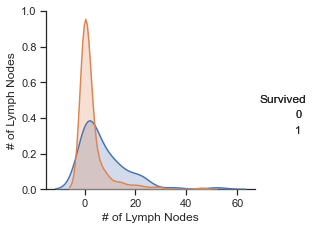

In [15]:
sns.set(style="ticks")
#sns.set_palette(sns.color_palette("husl", 8))
g = sns.pairplot(data=lymphNodeData, hue="Survived", height=3)
g = g.add_legend()


# Setting up train and test data

In [16]:
import collections
from sklearn.model_selection import train_test_split
X_train_A, X_test_A, Y_train_A, Y_test_A = train_test_split(lymphNodeData.drop(['Survived'], axis=1), lymphNodeData['Survived'], test_size=0.30, random_state=42)
print(collections.Counter(Y_train_A))
print(collections.Counter(Y_test_A))

Counter({1: 159, 0: 55})
Counter({1: 66, 0: 26})


# Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB
model_NB_node = GaussianNB()
model_NB_node.fit(X_train_A, Y_train_A)

GaussianNB()

# Evaluation

Accuracy:  0.7065217391304348
AUC 0.6972610722610723
Precision 0.7532467532467533
Recall 0.8787878787878788


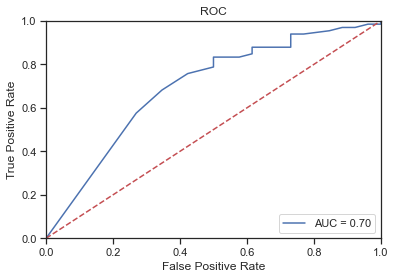

<Figure size 432x288 with 0 Axes>

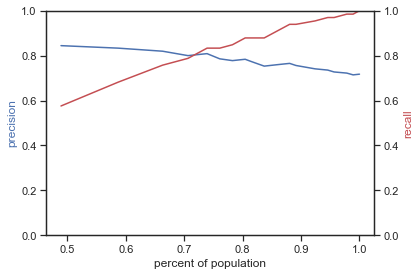

In [18]:
name = "Gaussian Naive Bayes Node"
line_fmt = "-"


from sklearn import metrics
import sklearn.metrics as metrics
import numpy as np #will need this for PR
from sklearn.metrics import roc_auc_score

threshold = 0.5
accuracy = model_NB_node.score(X_test_A, Y_test_A)
print("Accuracy: ", accuracy)
NB_pred_node = model_NB_node.predict_proba(X_test_A)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test_A, NB_pred_node)
auc_score_NB = metrics.auc(fpr, tpr)
print("AUC",metrics.roc_auc_score(Y_test_A, NB_pred_node))
print("Precision", metrics.precision_score(Y_test_A, NB_pred_node > threshold))
print("Recall",metrics.recall_score(Y_test_A, NB_pred_node > threshold))

plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' %auc_score_NB)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], 'r--') #x=y line.  Visual aid
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

plt.title('PR')
y_score = NB_pred_node
precision_curve, recall_curve, pr_thresholds = metrics.precision_recall_curve(Y_test_A, NB_pred_node)
precision_curve = precision_curve[:-1]
recall_curve = recall_curve[:-1]
pct_above_per_thresh = []
number_scored = len(NB_pred_node)
for value in pr_thresholds:
    num_above_thresh = len(y_score[NB_pred_node >= value])
    pct_above_thresh = num_above_thresh / float(number_scored)
    pct_above_per_thresh.append(pct_above_thresh)
pct_above_per_thresh = np.array(pct_above_per_thresh)
plt.clf()
fig, ax1 = plt.subplots()
ax1.plot(pct_above_per_thresh, precision_curve, 'b')
ax1.set_xlabel('percent of population')
ax1.set(ylim=(0, 1))

ax1.set_ylabel('precision', color='b')
ax2 = ax1.twinx()
ax1.plot(pct_above_per_thresh, recall_curve, 'r')
ax2.set_ylabel('recall', color='r')
    
plt.tight_layout()
plt.show()


# K-Nearest Neighbor

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model_knn_node = KNeighborsClassifier(n_neighbors = 25)
model_knn_node.fit(X_train_A, Y_train_A)

KNeighborsClassifier(n_neighbors=25)

# Evaluation

Accuracy:  0.7391304347826086
AUC 0.696969696969697
Precision 0.7837837837837838
Recall 0.8787878787878788


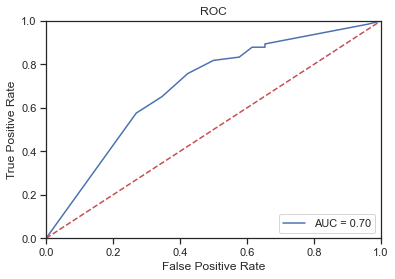

<Figure size 432x288 with 0 Axes>

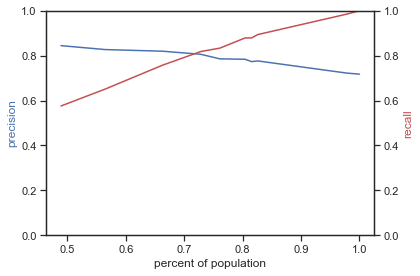

In [20]:
name = "K-Nearest Neighbor Node"
line_fmt = "-"

from sklearn import metrics
import sklearn.metrics as metrics
import numpy as np #will need this for PR
from sklearn.metrics import roc_auc_score

threshold = 0.5
accuracy = model_knn_node.score(X_test_A, Y_test_A)
print("Accuracy: ", accuracy)
KNN_pred_node = model_knn_node.predict_proba(X_test_A)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test_A, KNN_pred_node)
auc_score_KNN_node = metrics.auc(fpr, tpr)
print("AUC",metrics.roc_auc_score(Y_test_A, KNN_pred_node))
print("Precision", metrics.precision_score(Y_test_A, KNN_pred_node > threshold))
print("Recall",metrics.recall_score(Y_test_A, KNN_pred_node > threshold))

plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' %auc_score_KNN_node)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], 'r--') #x=y line.  Visual aid
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

y_score = KNN_pred_node
precision_curve, recall_curve, pr_thresholds = metrics.precision_recall_curve(Y_test_A, KNN_pred_node)
precision_curve = precision_curve[:-1]
recall_curve = recall_curve[:-1]
pct_above_per_thresh = []
number_scored = len(KNN_pred_node)
for value in pr_thresholds:
    num_above_thresh = len(y_score[KNN_pred_node >= value])
    pct_above_thresh = num_above_thresh / float(number_scored)
    pct_above_per_thresh.append(pct_above_thresh)
pct_above_per_thresh = np.array(pct_above_per_thresh)
plt.clf()
fig, ax1 = plt.subplots()
ax1.plot(pct_above_per_thresh, precision_curve, 'b')
ax1.set_xlabel('percent of population')
ax1.set(ylim=(0, 1))

ax1.set_ylabel('precision', color='b')
ax2 = ax1.twinx()
ax1.plot(pct_above_per_thresh, recall_curve, 'r')
ax2.set_ylabel('recall', color='r')
    

plt.tight_layout()
plt.show()

# Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
model_DT_node = DecisionTreeClassifier()
model_DT_node.fit(X_train_A, Y_train_A)

DecisionTreeClassifier()

# Evaluation

Accuracy:  0.6847826086956522
AUC 0.5154428904428905
Precision 0.7283950617283951
Recall 0.8939393939393939


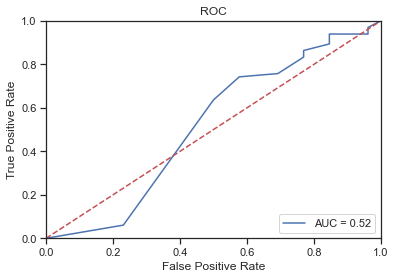

<Figure size 432x288 with 0 Axes>

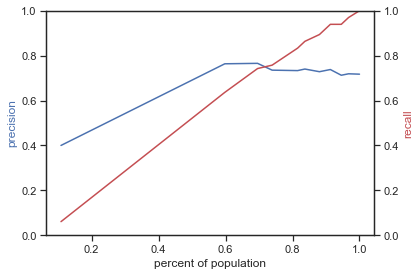

In [22]:
name = "Decision Tree for lymph nodes"
line_fmt = "-"

from sklearn import metrics
import sklearn.metrics as metrics
import numpy as np #will need this for PR
from sklearn.metrics import roc_auc_score

threshold = 0.5
accuracy = model_DT_node.score(X_test_A, Y_test_A)
print("Accuracy: ", accuracy)
DT_pred_node = model_DT_node.predict_proba(X_test_A)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test_A, DT_pred_node)
auc_score_DT_node = metrics.auc(fpr, tpr)
print("AUC",metrics.roc_auc_score(Y_test_A, DT_pred_node))
print("Precision", metrics.precision_score(Y_test_A, DT_pred_node > threshold))
print("Recall",metrics.recall_score(Y_test_A, DT_pred_node > threshold))

plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' %auc_score_DT_node)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], 'r--') #x=y line.  Visual aid
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

plt.title('PR')
y_score = DT_pred_node
precision_curve, recall_curve, pr_thresholds = metrics.precision_recall_curve(Y_test_A, DT_pred_node)
precision_curve = precision_curve[:-1]
recall_curve = recall_curve[:-1]
pct_above_per_thresh = []
number_scored = len(DT_pred)
for value in pr_thresholds:
    num_above_thresh = len(y_score[DT_pred_node >= value])
    pct_above_thresh = num_above_thresh / float(number_scored)
    pct_above_per_thresh.append(pct_above_thresh)
pct_above_per_thresh = np.array(pct_above_per_thresh)
plt.clf()
fig, ax1 = plt.subplots()
ax1.plot(pct_above_per_thresh, precision_curve, 'b')
ax1.set_xlabel('percent of population')
ax1.set(ylim=(0, 1))

ax1.set_ylabel('precision', color='b')
ax2 = ax1.twinx()
ax1.plot(pct_above_per_thresh, recall_curve, 'r')
ax2.set_ylabel('recall', color='r')
    
plt.tight_layout()
plt.show()